In [10]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


In [4]:
iris = datasets.load_iris()
X = iris['data'][:,(2,3)]
y = (iris['target'] == 2).astype(np.int32)

svm_clf = Pipeline([
    ('scaler',StandardScaler()),
    ('linear_svc',LinearSVC(C=1,loss='hinge'))
])

svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [6]:
svm_clf.predict([[5.5,1.7]])

array([1], dtype=int32)

In [7]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

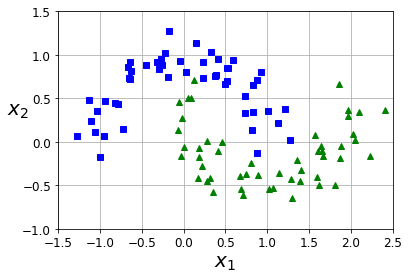

In [11]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [14]:
X, y = make_moons(n_samples=100, noise=.15)
polynomial_svm_clf = Pipeline([
    ("poly_features",PolynomialFeatures(degree=3)),
    ("scaler",StandardScaler()),
    ('svm_clf',LinearSVC(C=1, loss='hinge'))
])

polynomial_svm_clf.fit(X,y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=1, loss='hinge'))])

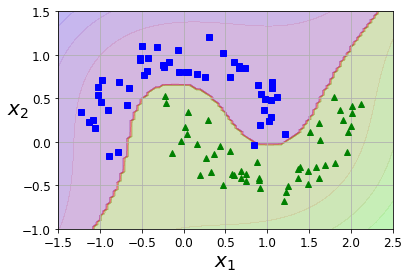

In [19]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(poly_kernel_svc_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

# save_fig("moons_polynomial_svc_plot")
plt.show()

In [20]:
from sklearn.svm import SVC

poly_kernel_svc_clf = Pipeline([
    ('scaler',StandardScaler()),
    ('svm_clf',SVC(kernel='poly',degree=10,coef0=1, C=5))
])

poly_kernel_svc_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, degree=10, kernel='poly'))])

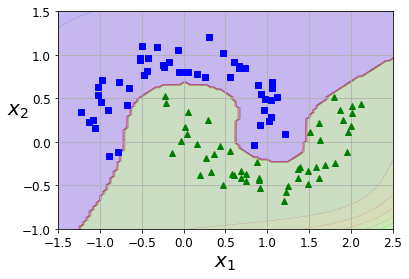

In [21]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(poly_kernel_svc_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

# save_fig("moons_polynomial_svc_plot")
plt.show()

In [22]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon = 1.5)
svm_reg.fit(X,y)

LinearSVR(epsilon=1.5)

In [24]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel='poly',degree=2, C=100, epsilon=.1)

svm_poly_reg.fit(X,y)

SVR(C=100, degree=2, kernel='poly')

In [25]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [32]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

C=5
alpha = 1 / (C * len(X))

lin_clf = LinearSVC(loss='hinge',C=C, random_state=42)
svc_clf = SVC(kernel='linear', C=C)
sgd_clf = SGDClassifier(loss='hinge', learning_rate='constant', 
    eta0 = .001, alpha=alpha, max_iter=1000,tol = .001, 
    random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lin_clf.fit(X_scaled,y)
svc_clf.fit(X_scaled,y)
sgd_clf.fit(X_scaled,y)

print("LinearSVC:                   ", lin_clf.intercept_, lin_clf.coef_)
print("SVC:                         ", svc_clf.intercept_, svm_clf.coef_)
print("SGDClassifier(alpha={:.5f}):".format(sgd_clf.alpha), sgd_clf.intercept_, sgd_clf.coef_)

LinearSVC:                    [0.28475098] [[1.05364854 1.09903804]]
SVC:                          [0.31896852] [[1.1203284  1.02625193]]
SGDClassifier(alpha=0.00200): [0.117] [[0.77714169 0.72981762]]


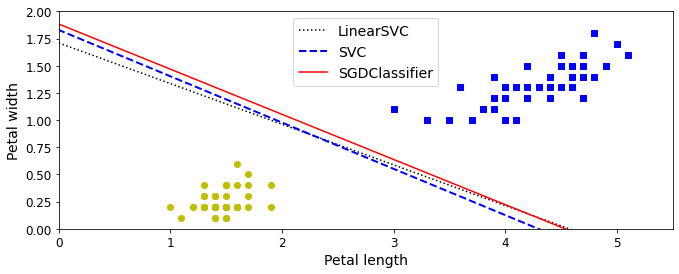

In [33]:
# Compute the slope and bias of each decision boundary
w1 = -lin_clf.coef_[0, 0]/lin_clf.coef_[0, 1]
b1 = -lin_clf.intercept_[0]/lin_clf.coef_[0, 1]
w2 = -svm_clf.coef_[0, 0]/svm_clf.coef_[0, 1]
b2 = -svm_clf.intercept_[0]/svm_clf.coef_[0, 1]
w3 = -sgd_clf.coef_[0, 0]/sgd_clf.coef_[0, 1]
b3 = -sgd_clf.intercept_[0]/sgd_clf.coef_[0, 1]

# Transform the decision boundary lines back to the original scale
line1 = scaler.inverse_transform([[-10, -10 * w1 + b1], [10, 10 * w1 + b1]])
line2 = scaler.inverse_transform([[-10, -10 * w2 + b2], [10, 10 * w2 + b2]])
line3 = scaler.inverse_transform([[-10, -10 * w3 + b3], [10, 10 * w3 + b3]])

# Plot all three decision boundaries
plt.figure(figsize=(11, 4))
plt.plot(line1[:, 0], line1[:, 1], "k:", label="LinearSVC")
plt.plot(line2[:, 0], line2[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(line3[:, 0], line3[:, 1], "r-", label="SGDClassifier")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") # label="Iris versicolor"
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo") # label="Iris setosa"
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper center", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()

In [34]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

X = mnist["data"]
y = mnist["target"].astype(np.uint8)

In [38]:
X_train = X[:60_000]
X_test = X[60_000:]
y_train = y[:60_000]
y_test = y[60_000:]

In [39]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

lin_clf = LinearSVC()
lin_clf.fit(X_train,y_train)

y_pred = lin_clf.predict(X_test)
accuracy_score(y_test,y_pred)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8628

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

scaler = StandardScaler()

lin_clf = LinearSVC()

clf_pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('classifier',LinearSVC())
])

clf_pipeline.fit(X_train,y_train)

y_pred = clf_pipeline.predict(X_test)
accuracy_score(y_test,y_pred)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9077

In [41]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform
from sklearn.pipeline import Pipeline

svm_clf = SVC(gamma="scale")
param_distributions = {"classifier__gamma": reciprocal(0.001, 0.1), "classifier__C": uniform(1, 10)}

clf_pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('classifier',svm_clf)
])

rnd_search_CV = RandomizedSearchCV(clf_pipeline, param_distributions, n_iter=10, verbose=2, cv=3)

rnd_search_CV.fit(X_train[:10_000],y_train[:10_000])

# y_pred = clf_pipeline.predict(X_test)
# accuracy_score(y_test,y_pred)



Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END classifier__C=4.407421274031337, classifier__gamma=0.02724588213810017; total time=  40.8s
[CV] END classifier__C=4.407421274031337, classifier__gamma=0.02724588213810017; total time=  41.2s
[CV] END classifier__C=4.407421274031337, classifier__gamma=0.02724588213810017; total time=  41.4s
[CV] END classifier__C=10.559933160802267, classifier__gamma=0.003819158287251288; total time=  22.0s
[CV] END classifier__C=10.559933160802267, classifier__gamma=0.003819158287251288; total time=  22.5s
[CV] END classifier__C=10.559933160802267, classifier__gamma=0.003819158287251288; total time=  21.8s
[CV] END classifier__C=3.025645890860772, classifier__gamma=0.007880029848825989; total time=  35.9s
[CV] END classifier__C=3.025645890860772, classifier__gamma=0.007880029848825989; total time=  35.7s
[CV] END classifier__C=3.025645890860772, classifier__gamma=0.007880029848825989; total time=  34.8s
[CV] END classifier__C=10.0033

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('classifier', SVC())]),
                   param_distributions={'classifier__C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x155205ed0>,
                                        'classifier__gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x155207280>},
                   verbose=2)

In [42]:
rnd_search_CV.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 SVC(C=10.46992134668767, gamma=0.0022375628476256695))])

In [43]:
rnd_search_CV.best_score_

0.9318999386441345

In [46]:
y_pred = rnd_search_CV.best_estimator_.predict(X_test)
accuracy_score(y_test,y_pred)

0.9687

In [47]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

X = housing['data']
y = housing['target']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=42)

from sklearn.svm import LinearSVR

svm_reg = LinearSVR(random_state=42)

svr_pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('svm_reg',LinearSVR(random_state=42))
])

svr_pipeline.fit(X_train,y_train)

y_pred = svr_pipeline.predict(X_test)

from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test,y_pred))

print(rmse)

0.7623633525948943


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [48]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {"reg__gamma": reciprocal(0.001, 0.1), "reg__C": uniform(1, 10)}

reg_pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('reg',SVR())
])

rnd_search_cv = RandomizedSearchCV(reg_pipeline, param_distributions, n_iter=10,verbose=2,cv=3,random_state=42)

rnd_search_CV.fit(X_train,y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END classifier__C=1.4443473929872976, classifier__gamma=0.0038227942533512077; total time=   0.0s
[CV] END classifier__C=1.4443473929872976, classifier__gamma=0.0038227942533512077; total time=   0.0s
[CV] END classifier__C=1.4443473929872976, classifier__gamma=0.0038227942533512077; total time=   0.0s
[CV] END classifier__C=1.2789886544376796, classifier__gamma=0.0953067791249827; total time=   0.0s
[CV] END classifier__C=1.2789886544376796, classifier__gamma=0.0953067791249827; total time=   0.0s
[CV] END classifier__C=1.2789886544376796, classifier__gamma=0.0953067791249827; total time=   0.0s
[CV] END classifier__C=10.475648936157304, classifier__gamma=0.010676737601304746; total time=   0.0s
[CV] END classifier__C=10.475648936157304, classifier__gamma=0.010676737601304746; total time=   0.0s
[CV] END classifier__C=10.475648936157304, classifier__gamma=0.010676737601304746; total time=   0.0s
[CV] END classifier__C=5

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Library/Frameworks/Python.framework/Ver

ValueError: Unknown label type: 'continuous'